# Introduction
For this project, I wanted to decide the best neighborhood in Pittsburgh by looking at a metric for leisure. After looking through the WPRDC website and skimming their datasets, I found one that I thought would work well.
# Dataset Used
The dataset I used was a list of all the  playgrounds that were in each neighborhood. I needed to sort these by neighborhood and then count the total number of playgrounds per neighborhood. The first thing I did was read in the data.

In [10]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt
data = pd.read_csv("https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367")
data.head()

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
4,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064


# Analysis
Then I sorted the data according to neighborhood and counted the number of occurences. The `id` column stored the number of playgrounds per neighborhood. I then sorted the neighborhoods from most playgrounds to least in `sortedData`. Using `sortedData`, I was able to plot the data in a bar graph. By using geopands, I could plot this data on a map.

Text(0.5, 1.0, 'Number of Playgrounds in the Neighborhoods of Pittsburgh')

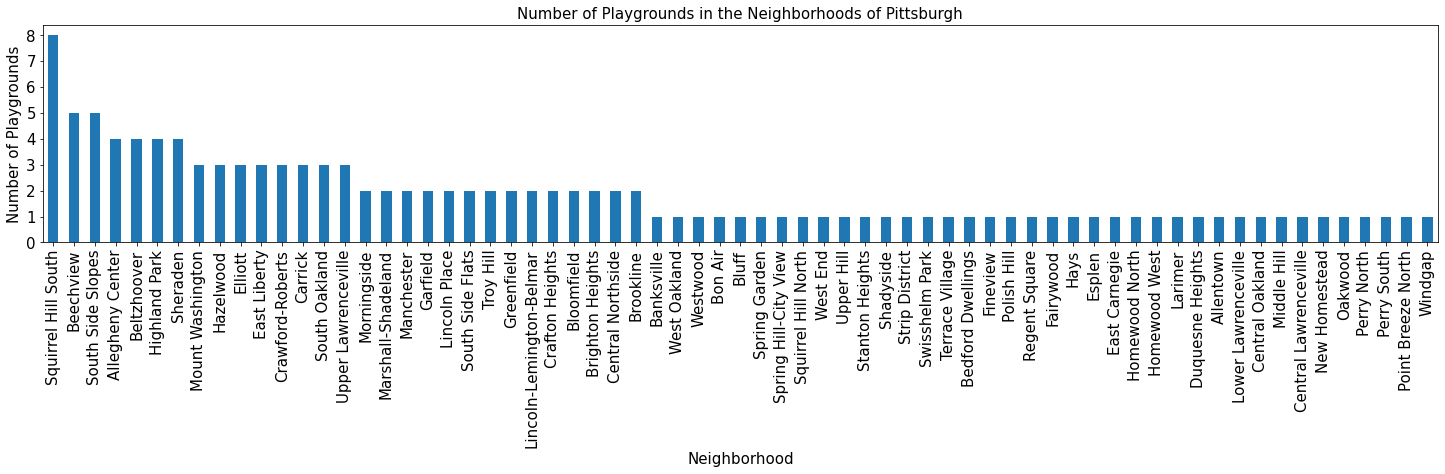

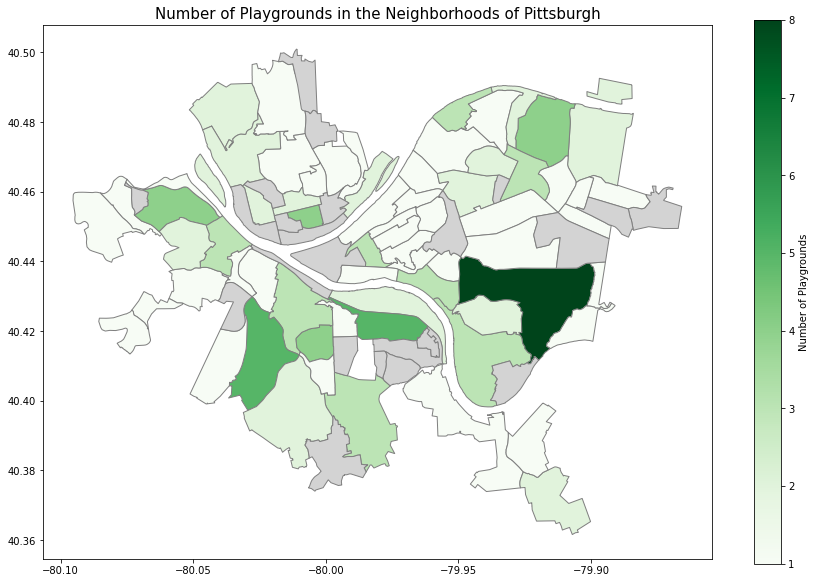

In [19]:
data = pd.read_csv("https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367")
data = data.groupby('neighborhood').count()

sortedData = data[['id']].sort_values(by='id', ascending=False)

ax = sortedData.plot(kind='bar', figsize=(25,4),legend=False, fontsize=15)
ax.set_title("Number of Playgrounds in the Neighborhoods of Pittsburgh", fontsize=15)
ax.set_xlabel('Neighborhood', fontsize = 15)
ax.set_ylabel('Number of Playgrounds', fontsize = 15)

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
playground_map = neighborhoods.merge(sortedData, how="left", left_on="hood", right_on="neighborhood")
map = playground_map.plot(column='id', cmap='Greens', edgecolor="grey", legend=True, legend_kwds={'label': "Number of Playgrounds"}, figsize=(15, 10), 
                          missing_kwds={"color": "lightgrey"})
map.set_title("Number of Playgrounds in the Neighborhoods of Pittsburgh", fontsize = 15)

# Conclusion
As clearly seen both the bar graph and map, Squirrel Hill South is the best neighborhood in Pittsburgh, according to my metric. My metric is purely quantitative, so the best neighborhood would simply be the neighborhood with the most amount of playgrounds. Following Squirell Hill South, the next best neighborhoods are Beechview, South Side Slopes, Allegheny Center, and Beltzhoover. It is important to note that this metric purely looks at playgrounds reported by